# Exploring relationships between variables through visualisations

1. Importing libraries
2. Identifying important variables
3. Correlation heatmap matrix
4. Scatterplots looking at employment status
    1. Age 
    2. Population size
    3. Seniority
    4. Length of service
    5. Store number
    6. Gender
    7. Business unit
5. Scatterplot looking at Age and Length of Service
6. Pair plots
7. Categorical plots
8. Acknowledging the limitations of the dataset 

# 1. Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#checking version of matplotlib 
matplotlib.__version__

'3.5.2'

In [3]:
#ensuring my charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#create path
path = r'C:\Users\rutha\CareerFoundry\04-23_EmployeeAttrition'

In [5]:
#import data set
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'encoded_data.csv'), index_col=False)

In [6]:
#display all columns in dataframe
pd.set_option('display.max_columns', None)

In [7]:
#checking output
df.head()

,Unnamed: 0,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,pop_flag,gender,seniority,age_flag,termreason_desc,termtype_desc,business_unit,gender.1,employment_status,business_unit.1,Not Applicable,Retirement,Resignaton,Layoff,Not Applicable.1,Voluntary,Involuntary,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
#removing unnecessary index column
df.drop(columns='Unnamed: 0', inplace =True)

In [9]:
#checking output
df.head()

,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,pop_flag,gender,seniority,age_flag,termreason_desc,termtype_desc,business_unit,gender.1,employment_status,business_unit.1,Not Applicable,Retirement,Resignaton,Layoff,Not Applicable.1,Voluntary,Involuntary,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,large_country,M,c_suite,older_adults,Not Applicable,Not Applicable,HEADOFFICE,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df.shape

(49644, 36)

Dataframe is the same shape and size as the file saved at the end of the previous python notebook.

# 2. Identifying important variables 

In the previous exercise I cleaned the dataset and derived some new aggregated variables based on the data we had. I have identified a few key variables which may have an impact on attrition:

   1. **Age**: we have the original numerica value of age, and I have also grouped employees into *three* age groups, young adults, mid adults, and older adults
   2. **Seniority**: employees have been grouped into *four* categories depending on their level of seniority: associate, manager, director, and c_suite. 
   3. **City population**: we have the original numeric value of population and then I also grouped employees into *three* categories depending on the size of their town or city: small town, large town, and urban city. 
   4. **Gender**: the original dataset labelled all employees as either M (male) or F (female)
   5. **Type of profession**: the original dataset indicated whether an employee worked at a store or in the head office. 
   6. **Length of service**: the original dataset recorded the tenure of an employee as a numeric value. 
   7. **Store number**: the original dataset recorded the store number of each employee as a numeric value. 
   
Another interesting data point beyond whether the employee was terminated, is the nature of their termination. The dataset also lists whether the termination was voluntary or involuntary (or not applicable). 

# 3. Correlation matrix heatmap 

We have a number of variables we're interested in looking at, so I am going to create some subsets of the data so we can visualise them more easily. 

In [11]:
df.columns

Index(['country', 'department_name', 'terminationdate_key', 'age',
       'length_of_service', 'job_title', 'store_number', 'year_of_record',
       'population', 'pop_flag', 'gender', 'seniority', 'age_flag',
       'termreason_desc', 'termtype_desc', 'business_unit', 'gender.1',
       'employment_status', 'business_unit.1', 'Not Applicable', 'Retirement',
       'Resignaton', 'Layoff', 'Not Applicable.1', 'Voluntary', 'Involuntary',
       'large_country', 'medium_country', 'small_country', 'c_suite',
       'associate', 'director', 'manager', 'older_adults', 'mid_adults',
       'young_adults'],
      dtype='object')

In [12]:
#creating a subset of the data to check for correlations for length of service, age, store number, gender, and business unit
df_sub1=df[['employment_status','length_of_service', 'age', 'store_number','business_unit','gender']]

In [13]:
#checking output 
df_sub1.head()

,employment_status,length_of_service,age,store_number,business_unit,gender
0,0,17,52,35,HEADOFFICE,M
1,0,18,53,35,HEADOFFICE,M
2,0,19,54,35,HEADOFFICE,M
3,0,20,55,35,HEADOFFICE,M
4,0,21,56,35,HEADOFFICE,M


In [14]:
#looking at the correlation
df_sub1.corr()

,employment_status,length_of_service,age,store_number
employment_status,1.000000,0.025762,0.132573,-0.021824
length_of_service,0.025762,1.000000,0.909432,0.011656
age,0.132573,0.909432,1.000000,-0.004122
store_number,-0.021824,0.011656,-0.004122,1.000000


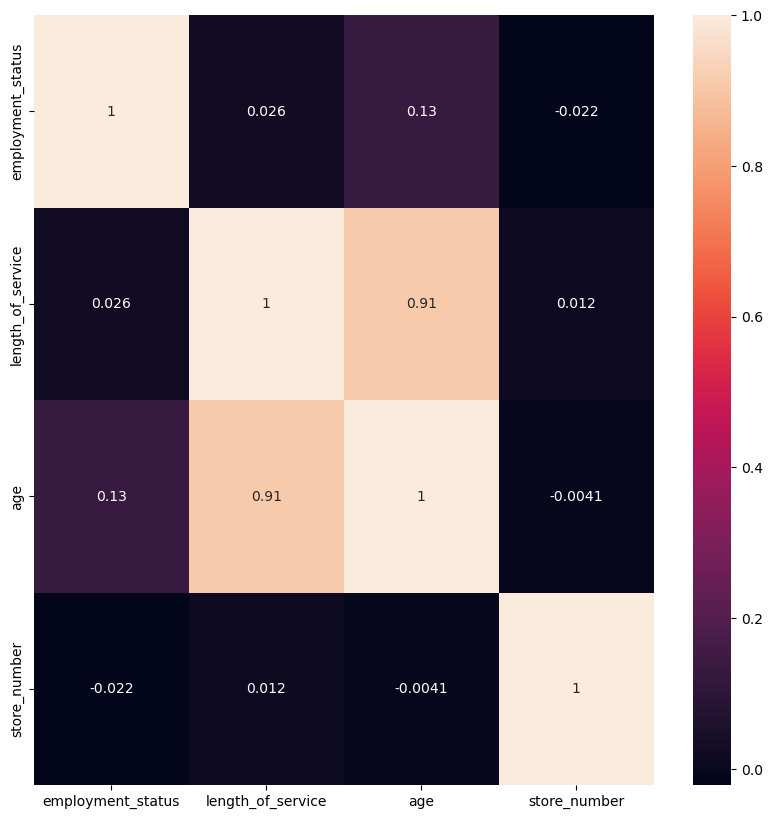

In [15]:
#creating a heatmap to look at the correlation visually 

#creating a subplot
f,ax = plt.subplots(figsize=(10,10))

#creating my correlation heatmap
corr1 = sns.heatmap(df_sub1.corr(), annot = True, ax = ax)

**Observations:** Overall, there is no correlation of any statistical significance in the dataset when looking at employment status. Where we do see correlation is between age and length of service, which is perhaps unsurprising. 

We do however, see a **strong** correlation between age and length of service, so this is something we can explore. 

In [16]:
#creating a second subset of the data to check for correlations for 
df_sub2 = df[['employment_status', 'population', 'medium_country', 'small_country', 'large_country', 'c_suite', 'associate', 'director', 'manager', 'older_adults', 'mid_adults', 'young_adults']]

In [17]:
#looking at the correlation
df_sub2.corr()

,employment_status,population,medium_country,small_country,large_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
employment_status,1.000000,-0.017789,-0.020471,0.027757,-0.006308,-0.051085,-0.005574,0.023628,0.048788,-0.097331,0.124748,-0.025677
population,-0.017789,1.000000,-0.360937,-0.661705,0.933525,0.038466,0.043614,0.053430,-0.058681,-0.030823,0.024895,0.006490
medium_country,-0.020471,-0.360937,1.000000,-0.402941,-0.556777,0.021311,-0.020544,-0.025168,-0.013141,0.020624,-0.023855,0.002861
small_country,0.027757,-0.661705,-0.402941,1.000000,-0.535894,-0.062500,-0.019774,-0.024224,0.073209,0.014938,-0.004429,-0.010785
large_country,-0.006308,0.933525,-0.556777,-0.535894,1.000000,0.037066,0.036899,0.045203,-0.054323,-0.032582,0.026026,0.007150
c_suite,-0.051085,0.038466,0.021311,-0.062500,0.037066,1.000000,-0.161479,-0.197820,-0.964327,0.124006,-0.262455,0.136301
associate,-0.005574,0.043614,-0.020544,-0.019774,0.036899,-0.161479,1.000000,-0.001235,-0.006021,-0.015314,0.037586,-0.022010
director,0.023628,0.053430,-0.025168,-0.024224,0.045203,-0.197820,-0.001235,1.000000,-0.007376,-0.022023,0.049365,-0.026963
manager,0.048788,-0.058681,-0.013141,0.073209,-0.054323,-0.964327,-0.006021,-0.007376,1.000000,-0.120931,0.254465,-0.131439
older_adults,-0.097331,-0.030823,0.020624,0.014938,-0.032582,0.124006,-0.015314,-0.022023,-0.120931,1.000000,-0.509694,-0.508712


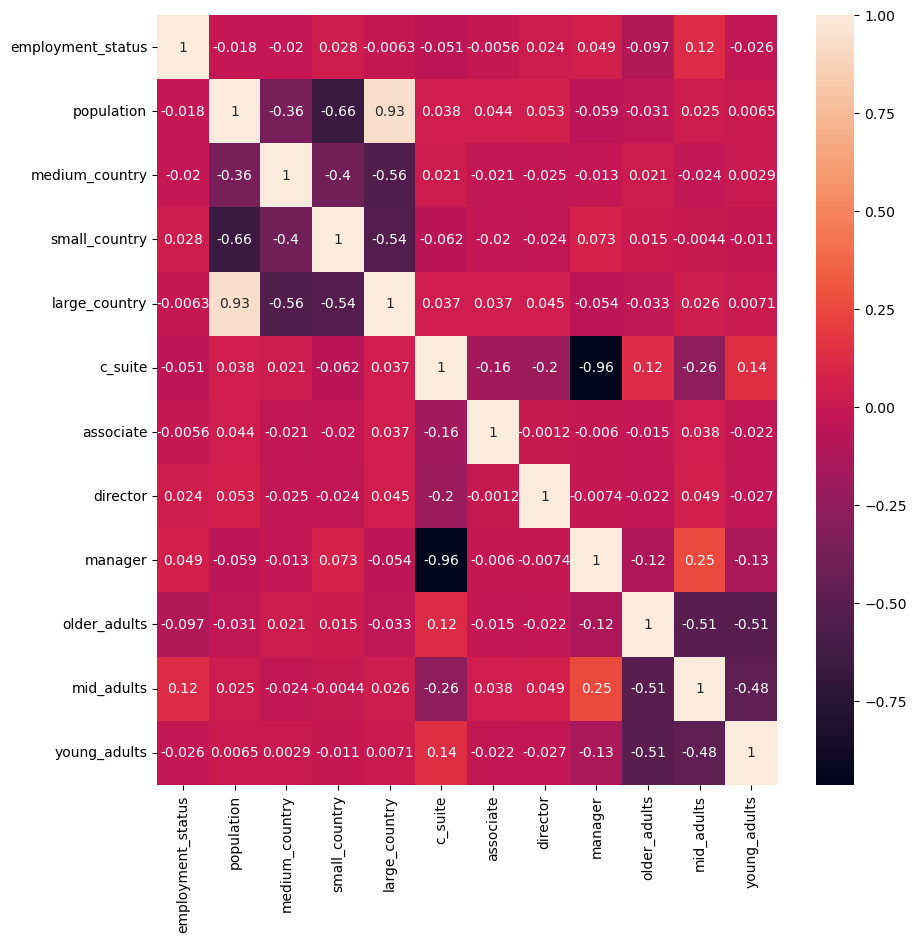

In [18]:
#creating a subplot
f,ax = plt.subplots(figsize=(10,10))

#creating my correlation heatmap
corr1 = sns.heatmap(df_sub2.corr(), annot = True, ax = ax)

**Observations:** Again, we don't see any correlation of any statistical significance when looking at employment status. We do however, see strong negative correlation when looking when looking at variables of the same category, i.e., c_suite and manager, or urban_city and large_town. Again, this is to be expected and is not relevant to our analyses. 

We also see a strong correlation between population and large country, again this isn't too surpsing but is unfortunately of little analytical interest. 

Correlations are a marker of *linear interdependence*, so early indidcations are there is one linear correlation in our dataset around age and length of service, but unfortunately not related to employment status. We will, however, explore this further with scatterplots and pair plots. 

# 4. Scatterplots looking at employment status

Using scatterplots to further investigate potential correlations with employment status

### A. Age 

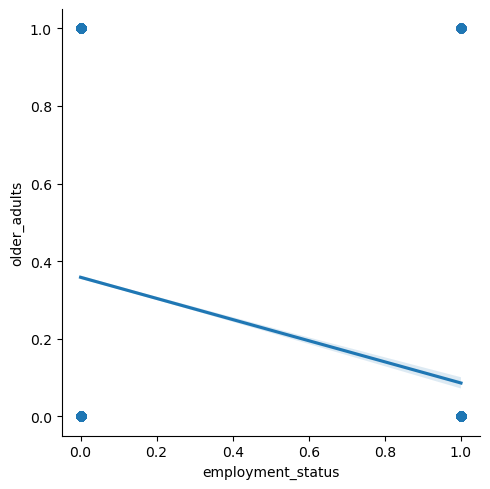

In [19]:
#creating a scatterplot for employment status and young adults 
sns.lmplot(x = 'employment_status', y = 'older_adults', data = df)

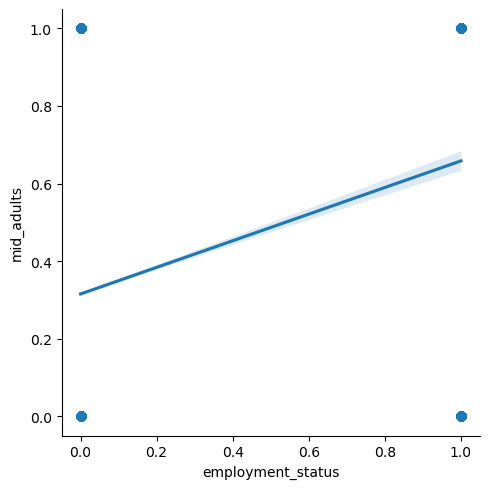

In [20]:
#creating a scatterplot for employment status and young adults 
sns.lmplot(x = 'employment_status', y = 'mid_adults', data = df)

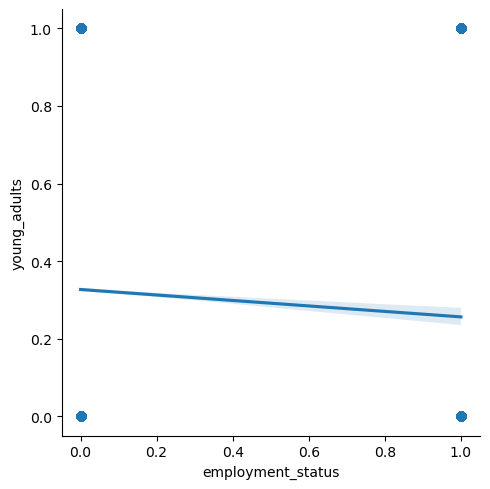

In [21]:
#creating a scatterplot for employment status and young adults 
sns.lmplot(x = 'employment_status', y = 'young_adults', data = df)

**Observations:** age appears to have some bearing on the employment status of an employee. In the first chart we see the line trending downwards indicating a negative correlation between the older age group and active employee status, meaning that age group trends towards being terminated. We see the reverse in the second chart where the line trending upwards indicates a positive correlation bewteen the middle age group and active employment status, meaning this age group trend towards being active employees status. In the final chart we see a smaller negatively trending line, indicating a weak negative correlation bewteen the young age group and active employment status. 

It is unsurprising for the older age group in particular, since the terimnations included in the original data file including retirements as well as redundencies, and you will typically only see retirements in the older age group category. 

### B. Population size

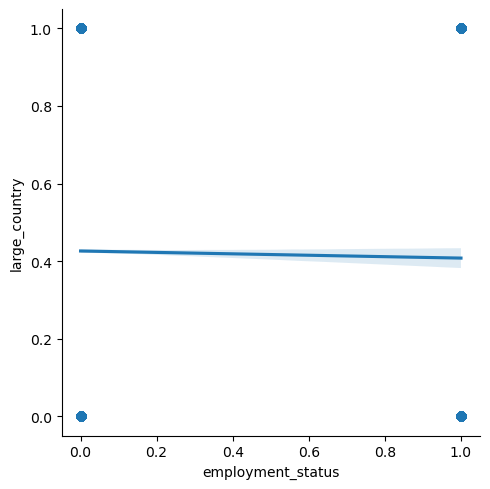

In [23]:
#creating a scatterplot for employment status and large country 
sns.lmplot(x = 'employment_status', y = 'large_country', data = df)

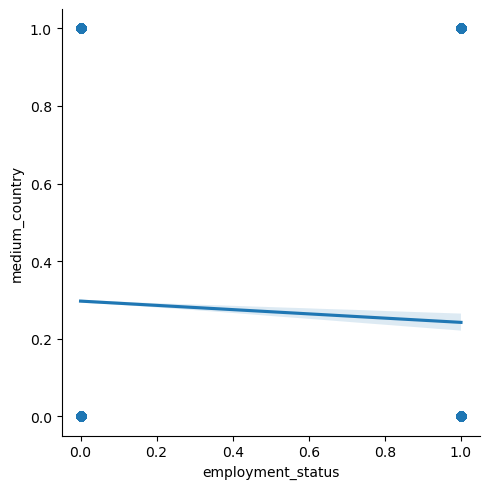

In [24]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'medium_country', data = df)

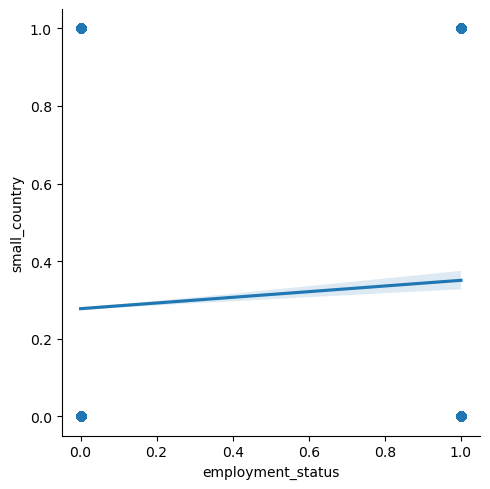

In [25]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'small_country', data = df)

**Observations:** the correlations we see in our population categories are much weaker compared to age. In the first chart, large country, we see a flat line indicating no correlation at all. In the second chart, medium country, we see a very weak negative correlation and in the final chart, small country, we see a very weak positive correlation. 

### C. Seniority

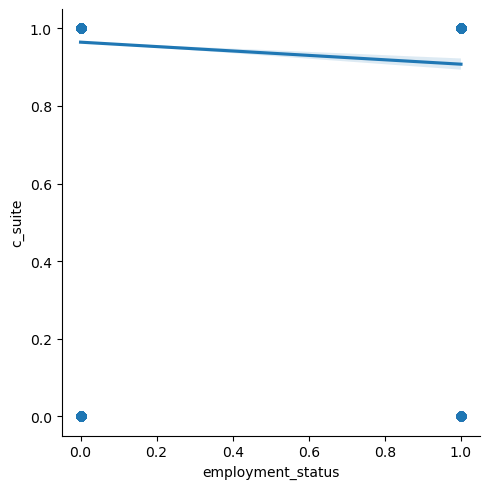

In [26]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'c_suite', data = df)

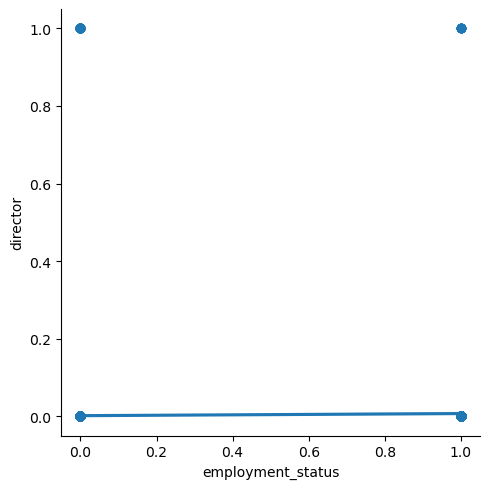

In [27]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'director', data = df)

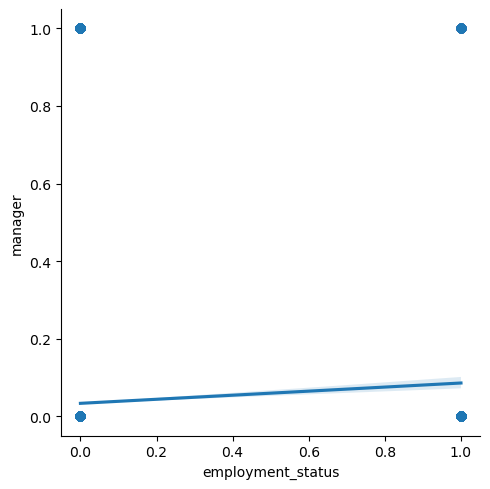

In [28]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'manager', data = df)

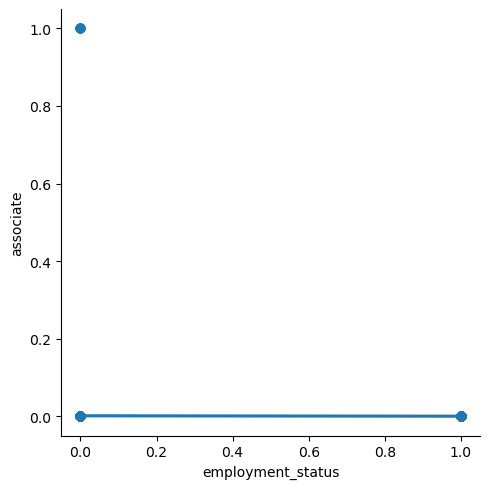

In [29]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'associate', data = df)

**Observations:** again, we're limited linear correlation across all four variables. For associates and directors there is no correlation at all, indicated by the flat line. For c_suite and managers, there are very weak trend lines negatively and positively respectively, but nothing of any statistical significance. 

### D. Length of Service

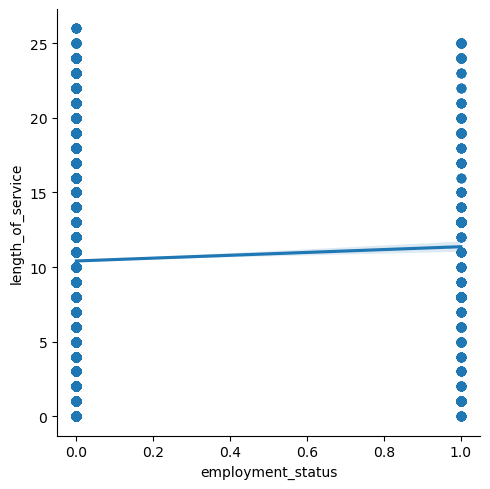

In [30]:
#creating a scatterplot for employment status and young adults 
sns.lmplot(x = 'employment_status', y = 'length_of_service', data = df)

**Observations:** I would have maybe expected to see a stronger positive correlation when looking at length of service and employment status. As employees get older and potentially stay with their company, they may then retire out of the company with a significant length of service. That being said, one of the limitations of this dataset is the unbalanced dependent variable, employment status. I go into more detail about this at the end of the notebook. 

### E. Store number

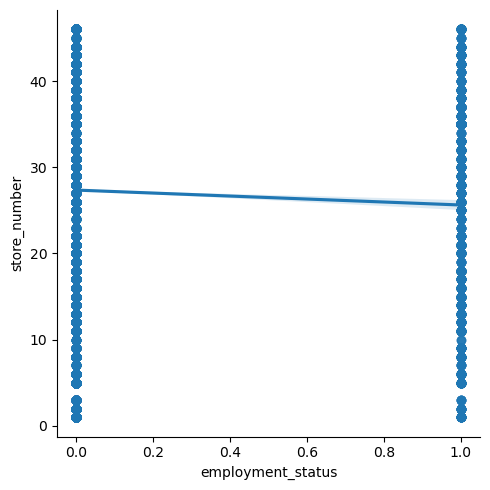

In [31]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'store_number', data = df)

**Oberservations:** store number appears to play no bearing on whether an employee is active or terminated. There is a very weak negative trend to the line, but nothing of any statistical significance. 

### F. Gender

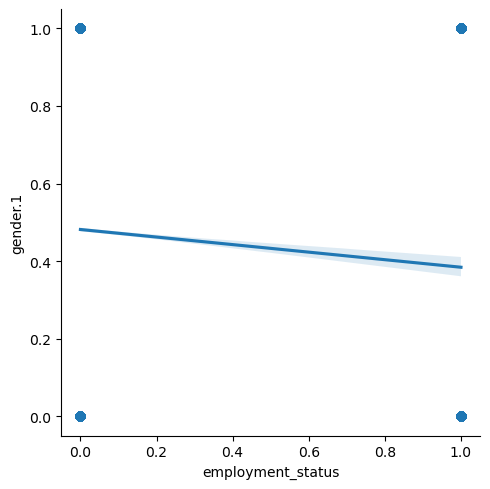

In [35]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'gender.1', data = df)

**Oberservations:** gender appears to play no bearing on whether an employee is active or terminated. There is a very weak negative trend to the line, but nothing of any statistical significance. 

### G. Business Unit

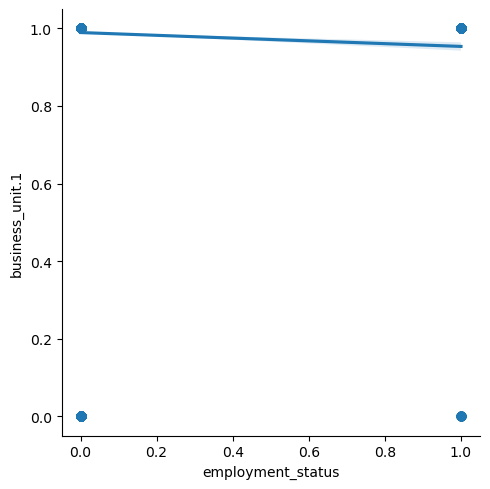

In [36]:
#creating a scatterplot for employment status and urban city 
sns.lmplot(x = 'employment_status', y = 'business_unit.1', data = df)

**Oberservations:** business unit appears to play no bearing on whether an employee is active or terminated. There is a very weak negative trend to the line, but nothing of any statistical significance. 

## 5. Scatterplot looking at Age and Length of Service

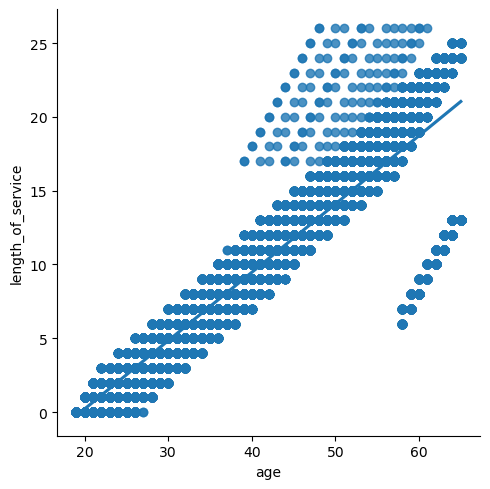

In [37]:
#creating a scatterplot for employment status and young adults 
sns.lmplot(x = 'age', y = 'length_of_service', data = df)

**Results:**

We see a very interesting plot when looking at age and length of service. They seems to be a clear linear correlation when comparing the two variables, whereby, the older you get the longer you stay with the company. 

There is an interesting set of outlier variables around the age of 60. It would be worthwhile investigating who these people are, perhaps they are c-suite level joining the company in their last role prior to retirement. 

The final point of observation is that there are a number of individuals over 40 who have been with the company for 20 years or more. 

## 6. Pair plots 

Pair plots help to visualise correlation between variables. Observations for all Pair Plots are detailed after the plots. 

In [38]:
sub_2 = df[['employment_status', 'age', 'length_of_service', 'population', 'gender']]

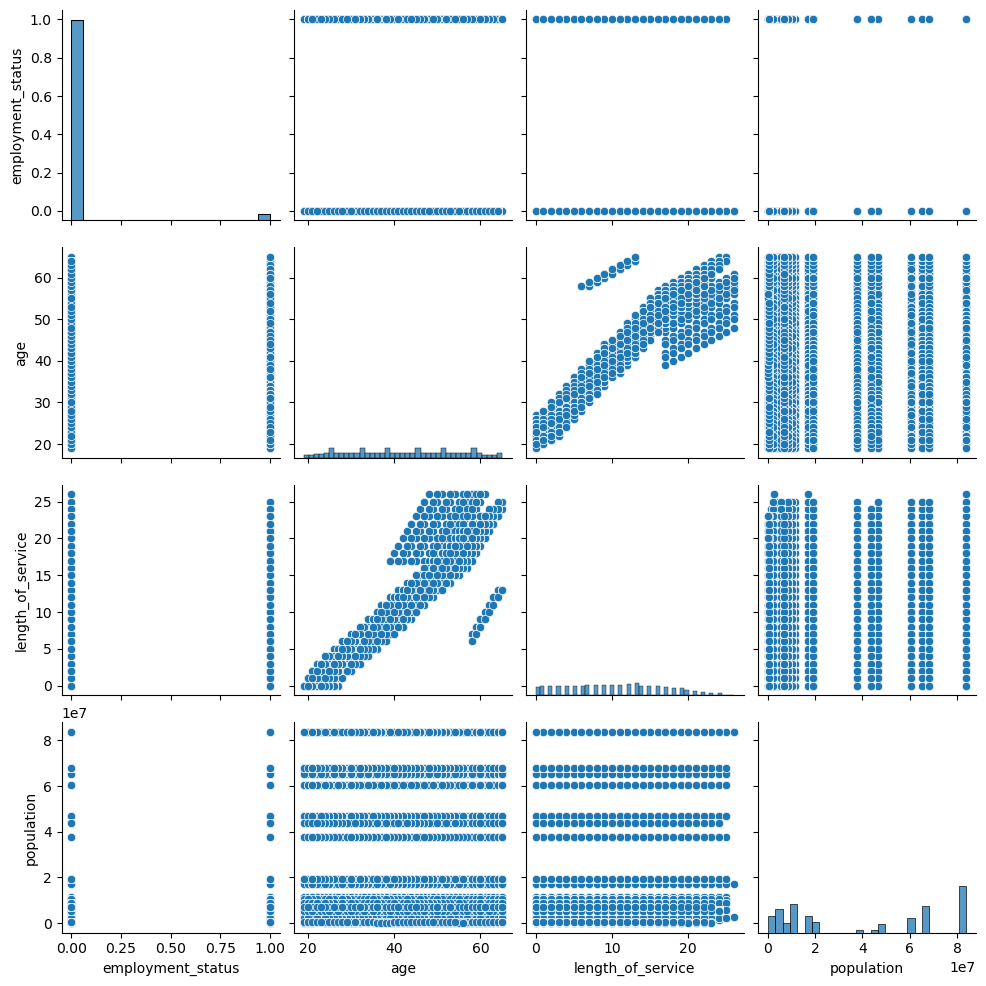

In [39]:
g = sns.pairplot(sub_2)

In [40]:
sub_3 = df[['employment_status', 'c_suite', 'director', 'manager', 'associate']]

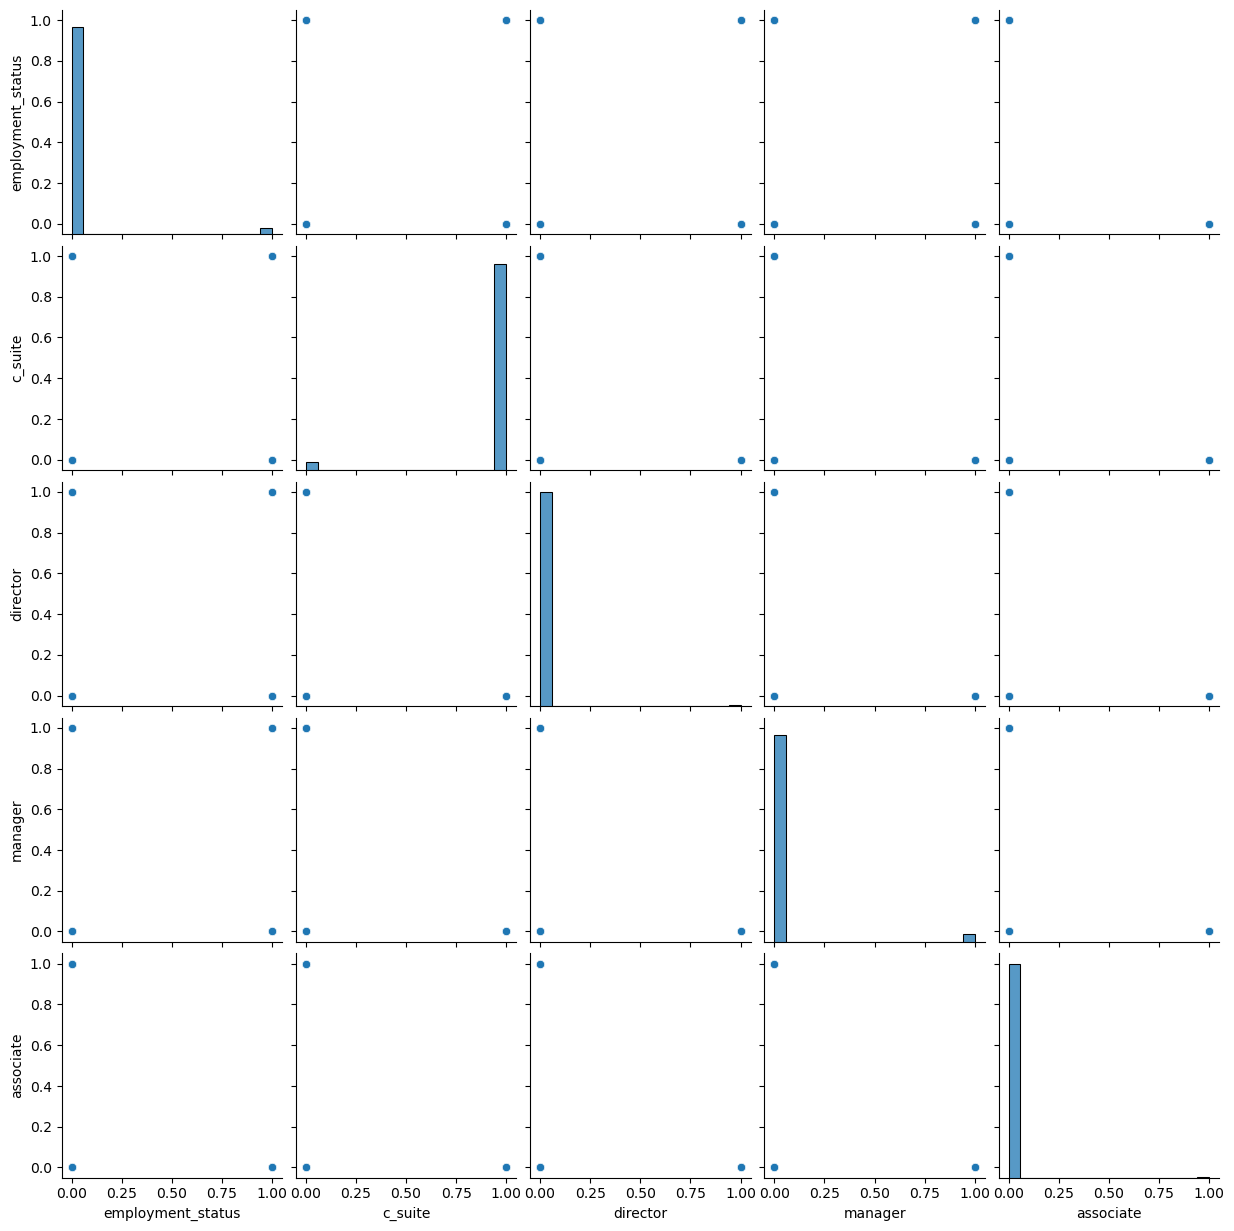

In [41]:
g = sns.pairplot(sub_3)

In [44]:
sub_4 = df[['employment_status', 'large_country', 'medium_country', 'small_country']]

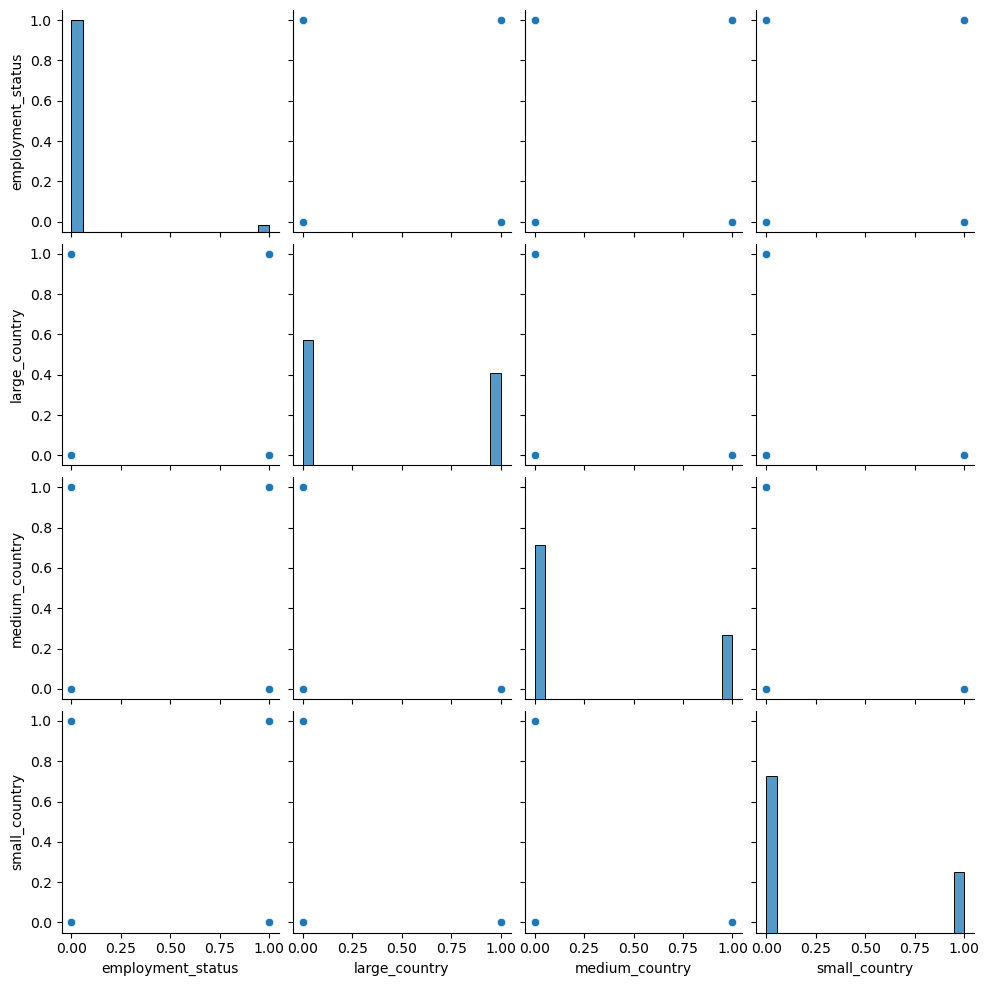

In [45]:
g = sns.pairplot(sub_4)

In [46]:
sub_5 = df[['employment_status', 'older_adults', 'mid_adults', 'young_adults']]

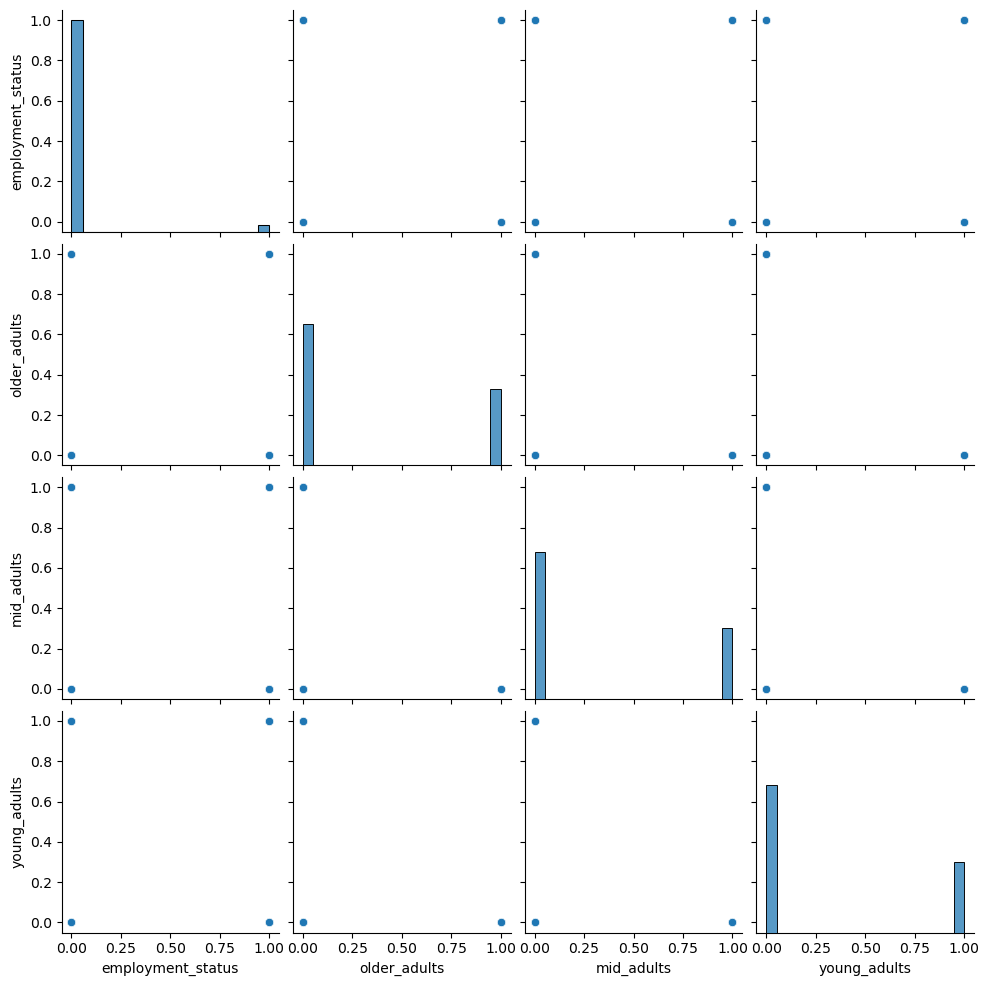

In [47]:
g = sns.pairplot(sub_5)

**Observations:** 

Given the nature of my dataset, and the prevalence of categorical values, I wasn't expecting pair plots to be an effective way of gauging correlation. As we can see in the above chart, particularly in the last three, there is no connection or pattern evident. 

The only instance of correlation we see is between the two continuous variables, age and length of service. 

## 7. Categorical plots

I want to explore the categorical variables in greater detail.

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

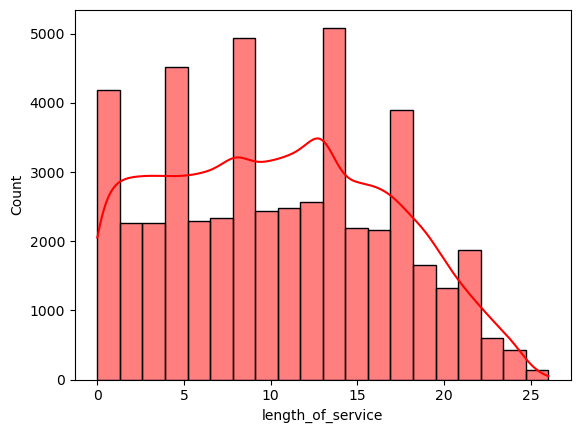

In [48]:
#create a histogram looking at the distribution of length of service
sns.histplot(df['length_of_service'], bins = 20, kde = True, color = 'red')

**Observations:** A right-tailed distribution when looking at *length of service* is to be expected as employees move from company-to-company during their career, so we would expect to see a higher number of lower-count *lengths of service* compared to high-counts.

What is interesting is we see peaks around 1, year, 5 years, 9 years, 14 years, and 17 years. Without knowing more about the company I'm not sure what would cause these but it's important to note that this is a fictional dataset created using R and randomisation, so that may have caused some irregularities. 

<AxesSubplot:xlabel='age', ylabel='Count'>

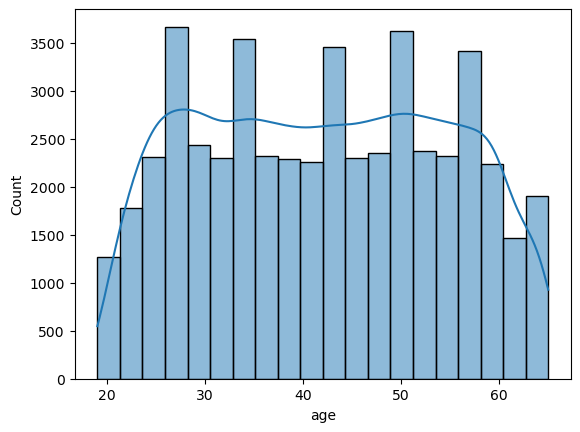

In [49]:
#create a histogram looking at distribution of age 
sns.histplot(df['age'], bins = 20, kde = True)

**Observations:** as detailed previously, this is a fictional dataset created using fake data generators, R, and the application of randomised functions. I wouldn't typically expect to see such regular peaks in employee ages in a real dataset. Interestingly the trend line flattens between ages 27 and 60.  

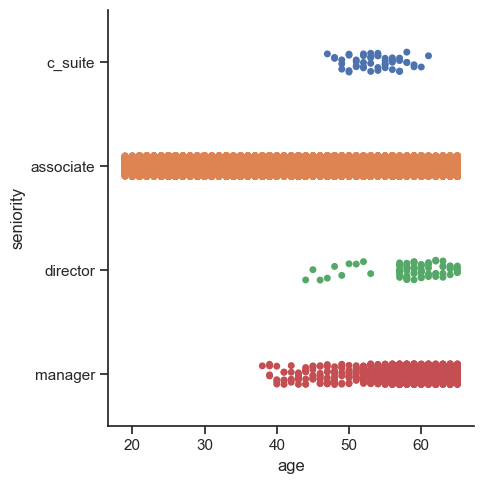

In [50]:
#looking at age and seniority 
sns.set(style="ticks")
g = sns.catplot(x="age", y="seniority", data=df)

**Observations:** employees in more senior roles tend to be older, but associates can be any age. 

Text(0.5, 12.44444444444443, 'Length of Service')

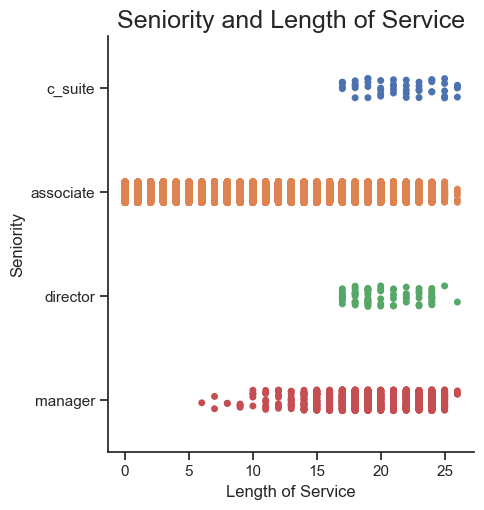

In [12]:
#looking at age and seniority 
sns.set(style="ticks")
g = sns.catplot(x="length_of_service", y="seniority", data=df)
plt.title("Seniority and Length of Service", fontsize = '18')
plt.ylabel('Seniority', fontsize = 12)
plt.xlabel('Length of Service', fontsize = 12)

**Observations:** we see similar distributions in length of service as age, whereby the more senior you are the longer your length of service. Again Associates have lengths of service which cover all distributions, excpet there is a slightly data point at the 25 year mark.

Text(0.5, 1.0, 'Split of Employee Gender ')

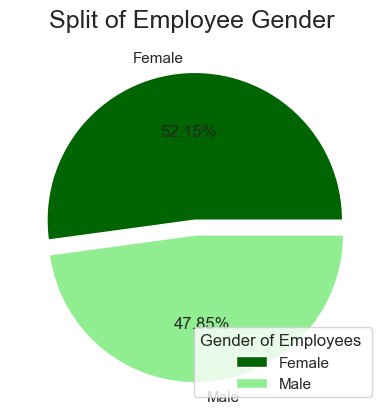

In [62]:
#looking at the split of gender in employees
gender = df['gender'].value_counts().plot.pie(labels = ['Female','Male'], autopct=('%.2f%%'), colors = ['darkgreen', 'lightgreen'], label = '', explode = [0,0.1])
gender.legend(title = 'Gender of Employees ', loc = 'lower right')
plt.title("Split of Employee Gender ", fontsize = '18')

**Observations:** our gender split is reasonably even between male and females. 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

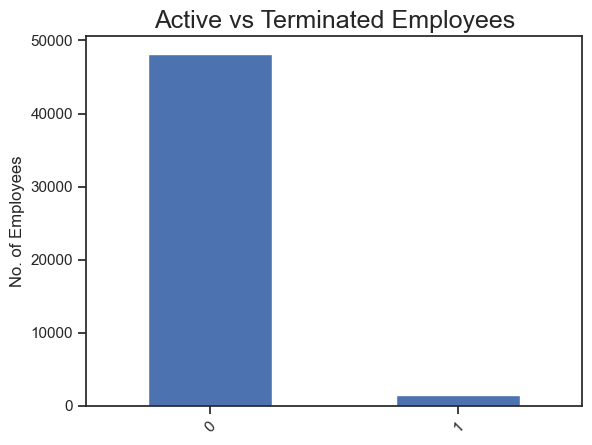

In [58]:
#bar chart to show active vs terminated employeees
df['employment_status'].value_counts().plot.bar()

plt.title("Active vs Terminated Employees", fontsize = '18')
plt.ylabel('No. of Employees', fontsize = 12)
plt.xticks(rotation=45)

**Observations:** we have a **very imbalanced dataset** when it comes to employment status. I go into greater detail about this in *8. Acknowledging the imitations of the dataset*

Text(0.5, 0, 'Age Grouping')

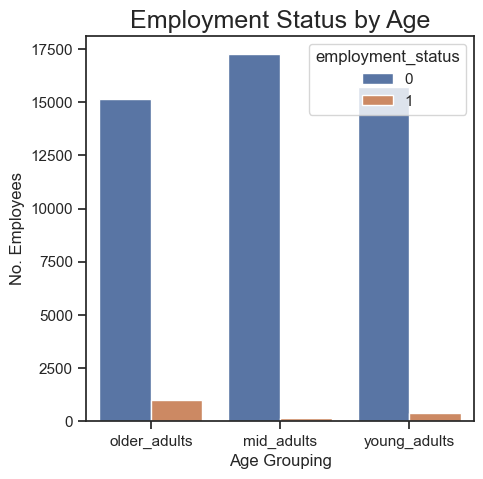

In [13]:
#looking at active vs terminated status, and age 
plt.figure(figsize=(5, 5))
sns.countplot(x="age_flag", hue="employment_status", data=df)
plt.title("Employment Status by Age", fontsize = '18')
plt.ylabel('No. Employees', fontsize = 12)
plt.xlabel('Age Grouping', fontsize = 12)

**Observations:** the majority of terminations fall within the older adults category. Terminations include voluntary and involuntary, and they also include retirements. We appear to have no terminations across the middle-age group.

(array([0, 1, 2]),
 [Text(0, 0, 'large_country'),
  Text(1, 0, 'medium_country'),
  Text(2, 0, 'small_country')])

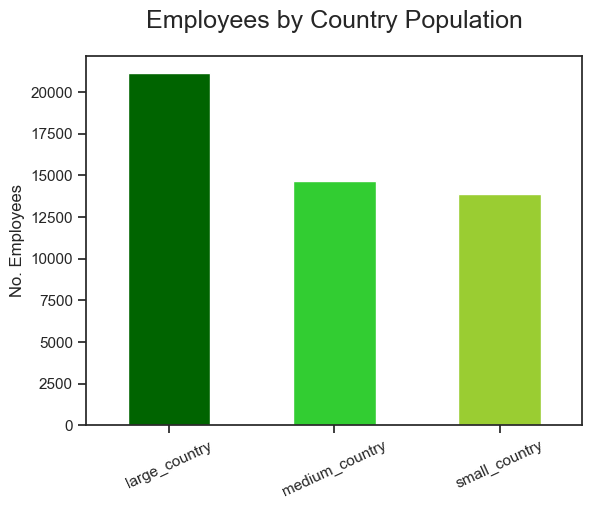

In [64]:
#creating a bar chart for population groupings
pop_flag = df['pop_flag'].value_counts().plot.bar(color = ['darkgreen', 'limegreen', 'yellowgreen'])
plt.title('Employees by Country Population', fontsize = 18, pad=20)
plt.ylabel('No. Employees', fontsize = 12)
plt.xticks(rotation=25)

In [65]:
df['pop_flag'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

large_country     42.5%
medium_country    29.5%
small_country     27.9%
Name: pop_flag, dtype: object

**Observations:** just under half of employees work in large countries (populations of over 50,000,000), just under 30% are in medium-sized countries, and just over a quarter are in small countries. 

Text(0, 0.5, 'No. Employees')

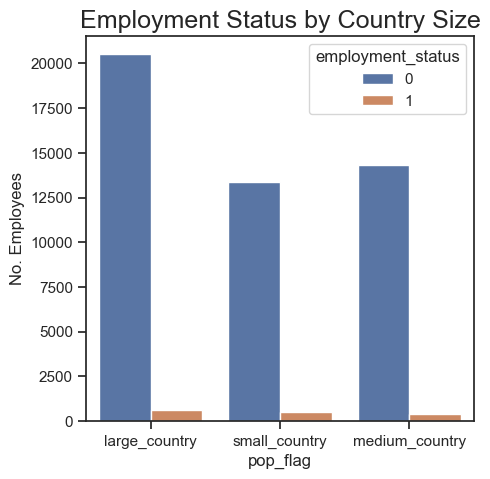

In [14]:
plt.figure(figsize=(5, 5))
sns.countplot(x="pop_flag", hue="employment_status", data=df)
plt.title("Employment Status by Country Size", fontsize = '18')
plt.ylabel('No. Employees', fontsize = 12)

**Observations:** the numbers of terminated employees across each population grouping appear to be very similar. When you factor in the difference in numbers, i.e., large countries accounting for nearly half of employees, it then appears that as a percentage of the whole, small countries have more terminated employees compared to large countries. 

Text(0, 0.5, 'No. Employees')

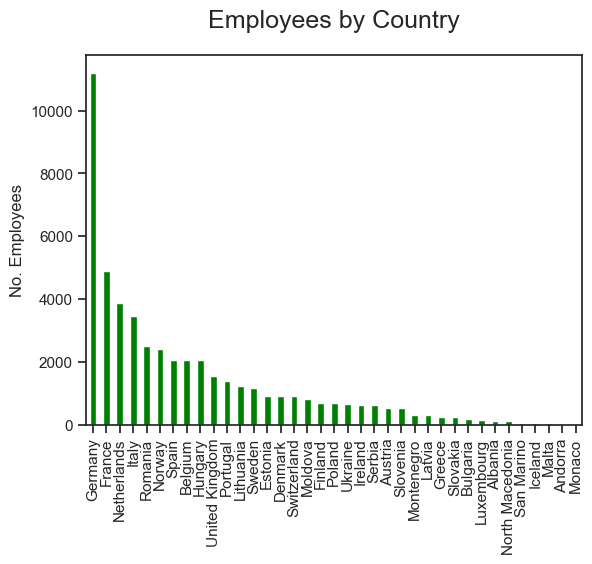

In [72]:
#bar chart to show city name comparison
df['country'].value_counts().plot.bar(color='green')
plt.title('Employees by Country', fontsize = 18, pad=20)
plt.ylabel('No. Employees', fontsize = 12)

**Observations:** as a reminder of the countries we're working with. All are based in the EU. 

Text(0.5, 1.0, 'Employment Status by Year')

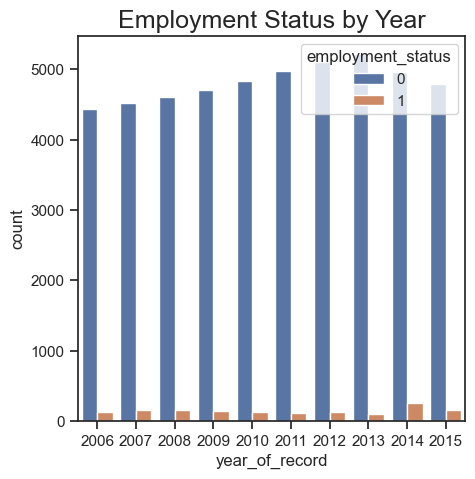

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(x="year_of_record", hue="employment_status", data=df)
plt.title("Employment Status by Year", fontsize = '18')

**Observations:** There appears to be a small peak in terminations in 2014, however, the numbers year on year don't appear to vary too much. Interestingly, we see a gradular increase in employee numbers until 2013 when it starts to decrease again.

## 8. Acknowledging the limitations of the dataset

Unfortunately the dependent variable I am using is both categorical and very imbalanced. The variable I am using - *employment status* - is split into the following categories:

    Active: 97%
    Terminated: 3%
    
This makes it challenging to find correlations, particularly as in this assignment, when we're looking for linear correlations. 

In [51]:
#separating the independent variable 'employment status' from the rest of the dataset
x = df.drop(['employment_status'], axis=1)
y = df['employment_status']

In [52]:
#checking the output for y value
y.value_counts()

0    48160
1     1484
Name: employment_status, dtype: int64

<AxesSubplot:ylabel='employment_status'>

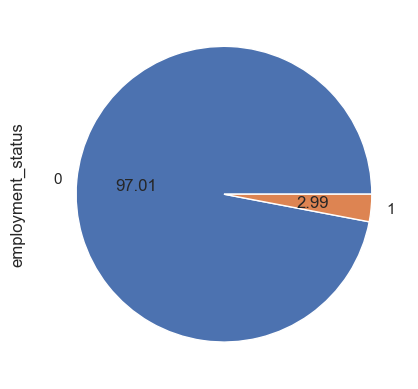

In [53]:
#plotting values in pie chart
y.value_counts().plot.pie(autopct='%.2f')